# Objective: 


# To show that median should be used over mean as the measure of central tendency, in case there exists an outlier in the dataset. 

Before proceeding ahead lets first understand some of the basics concepts that will be needed in order to acheive our objective.

1.Central Tendency: Central tendency is a single value that describes the whole dataset.


2.Mean: Mean is the average of the given numbers and is calculated by dividing the sum of given numbers by the total count of numbers.

    Mean = (Sum of all the observations/Total number of observations)
    

3.Outlier: An outlier is a datapoint that seems to be odd and acts uniquely by showing extreme deviation from general trend(data distribution).


4.Median: Median, in statistics, is the middle value of the given list of data when arranged in an order(ascending/descending).


5.Percentile: A value below which certain percentage of datapoints lie.
    
    -->25 percentile is first quartile denoted as q1.
    
    -->50 percentile is second quartile denoted as q2.
    
    -->75 percentile is third quartile denoted as q3.
    
    -->Difference between q3 and q1 is I.Q.R(Inter quartile range).
    
    -->Lower fence=Q1 - 1.5*(I.Q.R)
        For a data set Lower fence is the cutoff value below which datapoints are treated as outliers.
        
    -->Upper fence=Q3 + 1.5*(I.Q.R)
        For a data set Upper fence is the cutoff value above which datapoints are treated as outliers.
        
6.Boxplot: It is a plot that summarizes data in 5 values:

    --> Minimum value
    
    --> First quartile
    
    --> Second quartile
    
    --> Third quartile
    
    --> Maximun value
        
    



In [84]:
# Importing pythonic libraries needed for implementing our objective

import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Creating profile for original dataset

In [61]:
#Taking 30 random whole numbers under 100

data = []
for i in range(30):
    data.append(random.randrange(100))
print(data)

[97, 48, 64, 49, 52, 84, 81, 11, 3, 38, 9, 78, 10, 14, 83, 57, 36, 17, 82, 1, 2, 22, 38, 7, 46, 62, 32, 25, 94, 59]


In [72]:
#Calculating mean and median of original data

print("Mean =", np.mean(data))
print("Median =", np.median(data))

Mean = 43.36666666666667
Median = 42.0


In [93]:
#   Creating copy of original data so that any changes needed can be done in the copied data ensuring that the integrity of 
#   original data is maintained throughout the process

data_copy = data.copy()
print(data_copy)

[97, 48, 64, 49, 52, 84, 81, 11, 3, 38, 9, 78, 10, 14, 83, 57, 36, 17, 82, 1, 2, 22, 38, 7, 46, 62, 32, 25, 94, 59]


In [79]:
#Calculating the percentile of original dataset

q1,q2,q3 = np.percentile(data,[25,50,75])
print("First quartile =",q1)
print("Second quartile =",q2)
print("Third quartile =",q3)

First quartile = 14.75
Second quartile = 42.0
Third quartile = 63.5


In [80]:
#Calculating the lower and upper fence

iqr = q3-q1
lower_fence = q1 - 1.5*iqr
upper_fence = q3 + 1.5*iqr
print("Inter quartile range =", iqr)
print("Lower fence =", lower_fence)
print("Upper fence =", upper_fence)

Inter quartile range = 48.75
Lower fence = -58.375
Upper fence = 136.625


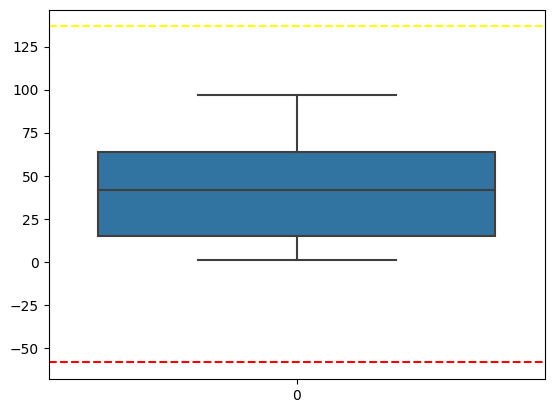

In [88]:
#Ploting Boxplot along with lower and upper fence

sns.boxplot(data)
plt.axhline(y=lower_fence, color='red', linestyle='--')  #drawing line parallel to x axis for lower_fence
plt.axhline(y=upper_fence, color='yellow', linestyle='--') #drawing line parallel to x axis for upper_fence

Above Boxplot is showing the distribution of our dataset in the range of 0 (Minimum value) to 100 (Maximum value). First, Second and third quartile is also represented by the same.

Yellow and Red dashed line is used for representing upper and lower fence, above and below which data points will be considered as Outliers respectively.

# Creating profile of copied data with outlier

In [94]:
#   Adding outlier to dataset. Lets use copied data instance for this so that original data can be later used to understand
#   the changes made after addition of outlier.

data_copy.append(-200)    #Adding datapoint (outlier) below defined lower fence
data_copy.append(400)    #Adding datapoint (outlier) above defined upper fence

print("Data before outlier addition:", data)
print("\n")
print("Data after outlier addition:", data_copy)

Data before outlier addition: [97, 48, 64, 49, 52, 84, 81, 11, 3, 38, 9, 78, 10, 14, 83, 57, 36, 17, 82, 1, 2, 22, 38, 7, 46, 62, 32, 25, 94, 59]


Data after outlier addition: [97, 48, 64, 49, 52, 84, 81, 11, 3, 38, 9, 78, 10, 14, 83, 57, 36, 17, 82, 1, 2, 22, 38, 7, 46, 62, 32, 25, 94, 59, -200, 400]


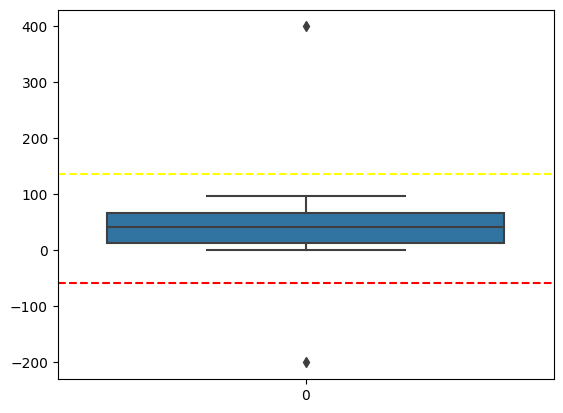

In [96]:
#Visualizing outliers

sns.boxplot(data_copy)
plt.axhline(y=lower_fence, color='red', linestyle='--')
plt.axhline(y=upper_fence, color='yellow', linestyle='--')

Above is the same boxplot that we used earlier with 2 outliers represented as diamond dots above and below of upper and lower fences respectively.

In [97]:
#Now calculating mean and median of copied data

print("Mean of copied data with outliers =", np.mean(data_copy))
print("Median of copied data with outliers =", np.median(data_copy))

Mean of copied data with outliers = 46.90625
Median of copied data with outliers = 42.0


In [98]:
#Now, let us compare original and copied data.
#Note that only copied data is having outlier.

print("Mean of original data =", np.mean(data))
print("Mean of copied data with outliers =", np.mean(data_copy))
print("----------------------------------------------------------------------------")
print("Median of original data =", np.median(data))
print("Median of copied data with outliers =", np.median(data_copy))

Mean of original data = 43.36666666666667
Mean of copied data with outliers = 46.90625
----------------------------------------------------------------------------
Median of original data = 42.0
Median of copied data with outliers = 42.0


# Conclusion

-- From above we can conclude that on introducing outliers to our dataset mean changed from 43.36666666666667 to 46.90625 .
Whereas, median (42) remained unchanged by the introduction of outiers.

-- If we would have taken a much higher/extreme datapoint as outlier, mean of dataset would have impacted drastically but, median would have not changed that much(or negligible).

-- In such a scenario, where presence of outlier is impacting a metric(mean) drastically, such a metric should be never used for describing the central tendency of dataset.

-- Therefore, we can conclude that median should be used over mean as the measure of central tendency, in case there exists an outlier in the dataset.
